# Heat Flux from Propellant (Open Burn, Top Down)
## Question: What's a safe distance from a burning propellant mass in terms of heat flux?
***
## Approach: Estimate the safe distance from test data
This notebook treats the heat flux and its estimation based on open burning of propellant in drums or in fires. NOT TREATED HERE are the results from a bottom ignition or an explosion where the burn varies significantly from a some-what steady-state top-down or perimeter-to-center burn of a collection of propellant. Or in other words, explosions are not treated hear or where the propellant is ejected up into the air and subsequently rapidly burns. Clint Guymon, Safety Management Services, Inc.
***
## Conclusions: The safe distance can be correlated to the mass of propellant
The safe distance is estimated from the mass of propellant based on the body of data compiled (>300 measurements of heat flux with >7 propellant types) for top-down burn scenarios. The proposed relationship is:
\begin{align}
d(m) & = 1.65\cdot [M(kg)]^{0.5}
\end{align}
This is more conservative than the existing correlation. See below findings.

***
## Necessary code and data import

In [1]:
#Import necessary packages
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sea

### Import data

The majority of the heat flux data is from "Scaling Studies of Thermal Radiation Flux from Burning Propellants" by J. Hay and R.W. Watson of Bureau of Mines as commissioned by the DDESB in 1992. Various propellant types and masses were tested in a top down burn or external fire of a single barrel or package of propellant.

In [2]:
df = pd.read_csv('jupyterfiles/heatfluxdata.csv')

In [3]:
#add new column for unique id = ref id + test id
df['Unique ID'] = df.agg('R{0[Reference ID]}T{0[Test #]}'.format, axis=1)
#add column for burn rate
burnRate = df.groupby('Unique ID').apply(lambda x: (np.percentile(x['Mass, kg']/x['Burn time, sec'],75)))
burnRate.name = 'Burn rate, kg/s'
#add column for safe heat flux (per 6055.09, 2012, V1.E9.3.1.2 to prevent second degree burns)
safeQ = df.groupby('Unique ID').apply(lambda x: (np.percentile((x['Burn time, sec']/0.858)**(-1/1.46),75)))
safeQ.name = 'Safe Heat Flux, cal/cm2/sec'
#add to dataframe
df['Burn rate, kg/s'] = df['Unique ID'].apply(lambda x:burnRate.loc[x])
df['Safe Heat Flux, cal/cm2/sec'] = df['Unique ID'].apply(lambda x:safeQ.loc[x])

## Data summary

In [4]:
summary = df.groupby('Reference ID')['Reference'].unique().to_frame()
summary['Propellant types'] = df.groupby('Reference ID')['Propellant type'].unique()
summary['# of Tests'] = df.groupby('Reference ID')['Test #'].nunique()
summary

,Reference,Propellant types,# of Tests
Reference ID,,,
1,"[DDESB BOM ""SCALING STUDIES OF THERMAL RADIATI...","[IMR5010, M1-8-SP, M1-8-MP, WC844, WC846, WCBl...",49
2,"[TNO T 1022 ""Thermal Radiation of Fireworks"" 1...",[Fireworks],16
3,[DDESB IIT Research Institute R. Pape T. Water...,"[M1, WC844]",46
4,"[SMS C. Guymon ""Heat flux from the Top Ignitio...",[WC814],1
5,[China Lake Ranges Test Operation Branch (DB11...,[M1 CL],1


In [5]:
#References
for i,each in enumerate(set(df['Reference'])):
    print(i,":",each) 

0 : SMS C. Guymon "Heat flux from the Top Ignition of a Single Barrel of WC814" TEAD 2020
1 : TNO T 1022 "Thermal Radiation of Fireworks" 1984
2 : DDESB BOM "SCALING STUDIES OF THERMAL RADIATION FLUX FROM BURNING PROPELLANTS" Hay and Watson 1992
3 : DDESB IIT Research Institute R. Pape T. Waterman A. Takata "Fire Hazards from Combustible Ammunition, Methodology Development (Phase I)" 1980
4 : China Lake Ranges Test Operation Branch (DB1110M), "Convective Combustion of a Hazard Division 1.3 M1 Gun Propellant in Fiber Barrels Heat Flux Data, 20 March 2020


In [6]:
#propellant types
set(df['Propellant type'])

{'Fireworks',
 'IMR5010',
 'M1',
 'M1 CL',
 'M1-8-MP',
 'M1-8-SP',
 'WC814',
 'WC844',
 'WC846',
 'WCBlank'}

In [7]:
#number of tests for each propellant
df.groupby('Propellant type')['Test #'].nunique()

Propellant type
Fireworks    16
IMR5010      13
M1           23
M1 CL         1
M1-8-MP      12
M1-8-SP      14
WC814         1
WC844        27
WC846         3
WCBlank       3
Name: Test #, dtype: int64

In [8]:
#total number of heat flux measurements
len(df)

309

In [9]:
df.describe() #summary statistics for numerical data

,Reference ID,"Mass, kg","Distance, m","Peak heat flux, cal/cm2/sec","Average heat flux, cal/cm2/sec","Burn time, sec","total heat radiated, Mcal","Drum diameter, cm","Burn rate, kg/s","Safe Heat Flux, cal/cm2/sec"
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,154.000000,309.000000,309.000000
mean,1.653722,71.438715,8.711909,0.515390,0.202992,32.340812,38.927398,59.376623,3.134573,0.115072
std,0.986842,69.395979,5.380795,0.691045,0.261836,31.918328,43.713577,3.829841,2.604405,0.052747
min,1.000000,0.340000,1.070000,0.001505,0.000579,3.500000,0.005000,36.000000,0.028333,0.022745
25%,1.000000,45.400000,4.000000,0.066250,0.031000,15.000000,13.700000,60.000000,1.408000,0.078317
50%,1.000000,49.900000,8.000000,0.267000,0.094000,21.900000,21.946223,60.000000,2.907051,0.108725
75%,3.000000,93.000000,15.000000,0.643000,0.261000,35.355339,54.840735,60.000000,3.966667,0.140897
max,5.000000,399.200000,20.000000,5.800000,1.402857,215.000000,229.200000,60.000000,20.000000,0.381763


In [10]:
df.head(3) #first 3 rows of the data frame

,Reference ID,Reference,Propellant type,Test #,"Mass, kg","Distance, m","Peak heat flux, cal/cm2/sec","Average heat flux, cal/cm2/sec","Burn time, sec","total heat radiated, Mcal",Notes,"Drum diameter, cm",Unique ID,"Burn rate, kg/s","Safe Heat Flux, cal/cm2/sec"
0,1,"DDESB BOM ""SCALING STUDIES OF THERMAL RADIATIO...",IMR5010,1,45.4,3.2,1.750,0.482,35.0,13.8,Barrel,60.0,R1T1,1.297143,0.078861
1,1,"DDESB BOM ""SCALING STUDIES OF THERMAL RADIATIO...",IMR5010,1,45.4,4.0,1.050,0.329,35.0,13.8,Barrel,60.0,R1T1,1.297143,0.078861
2,1,"DDESB BOM ""SCALING STUDIES OF THERMAL RADIATIO...",IMR5010,1,45.4,5.0,1.068,0.289,35.0,13.8,Barrel,60.0,R1T1,1.297143,0.078861


## Plot of the Safe Heat Flux vs. Exposure Time

Safe heat flux is per 6055.09, 2012, V1.E9.3.1.2 to prevent second degree burns.

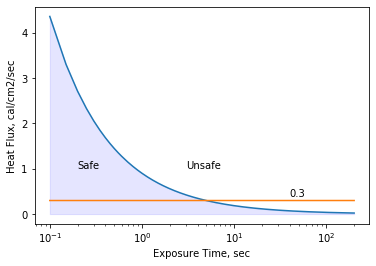

In [11]:
fig, ax = plt.subplots(1,1,figsize=(6,4))
x = np.arange(0.1,200,0.05); y=(x/0.858)**(-1/1.46); y1=0.3; y0=x*0
ax.set_xscale('log');
sea.lineplot(x,y); sea.lineplot(x,y1)
ax.fill_between(x,y,color="blue", alpha=0.1)
plt.text(0.2, 1, 'Safe');plt.text(3, 1, 'Unsafe');plt.text(40, 0.4, '0.3') #, bbox=dict(facecolor='red', alpha=0.5))
plt.xlabel('Exposure Time, sec');plt.ylabel('Heat Flux, cal/cm2/sec')
plt.show(block=False)

Here, burn time is equated to the exposure time. The horizontal line is at 0.3 cal/cm2/sec a value previously used for a limit by the DoD.

### Calculate a "Safe distance"

Calculate a safe distance based on the average heat flux observed in all of the tests to determine the parameters of the Point Source Model:
\begin{align}
q = \frac{\alpha}{r^2}
\end{align}
including the time of exposure (equal to the burn time in seconds) where the safe heat flux (cal/cm2/s) per 6055.09, 2012, V1.E9.3.1.2 to prevent second degree burns:
\begin{align}
q_\text{safe} & = \bigg(\frac{t}{0.858}\bigg)^\frac{-1}{1.46}
\end{align}

The average heat flux is used instead of the peak heat flux as the peak heat flux is a short term event and is a small fraction of the total burn typically.

In [12]:
pso = 2 #normal point source drops off to the second power

In [13]:
safeDistance = df.groupby('Unique ID').apply(lambda x: (np.percentile(x['Average heat flux, cal/cm2/sec']*
                                                                   x['Distance, m']**pso/x['Safe Heat Flux, cal/cm2/sec'],75)**(1/pso)))

In [14]:
df['Safe distance, m'] = df['Unique ID'].apply(lambda x:safeDistance.loc[x])

## Summary plots

In [15]:
sea.set_palette(sea.color_palette("Paired"))

In [16]:
bins = np.array([0.1, 20, 70, 160, 280, 500])
df['Mass bin, kg'] = pd.cut(df['Mass, kg'], bins)

The below plots show the average or peak heat flux from all tests as a function of distance.

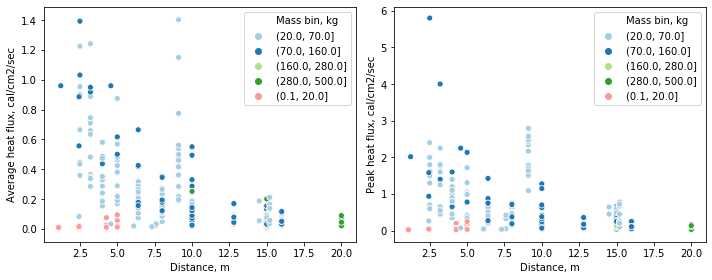

In [17]:
fig, ax = plt.subplots(1,2,figsize=(10,4))
sea.scatterplot(df['Distance, m'],df['Average heat flux, cal/cm2/sec'],hue=df['Mass bin, kg'],ax=ax[0])
sea.scatterplot(df['Distance, m'],df['Peak heat flux, cal/cm2/sec'],hue=df['Mass bin, kg'],ax=ax[1])
plt.tight_layout()
plt.show()

In [18]:
dfsub = df.drop(['Reference ID','Test #','Propellant type','Drum diameter, cm',
                 'Reference','Notes','Unique ID','Distance, m','Safe Heat Flux, cal/cm2/sec'],axis=1) #remove columns with strings

The below pair plot shows each variable plotted against the others with the color scheme based on the mass bins above.

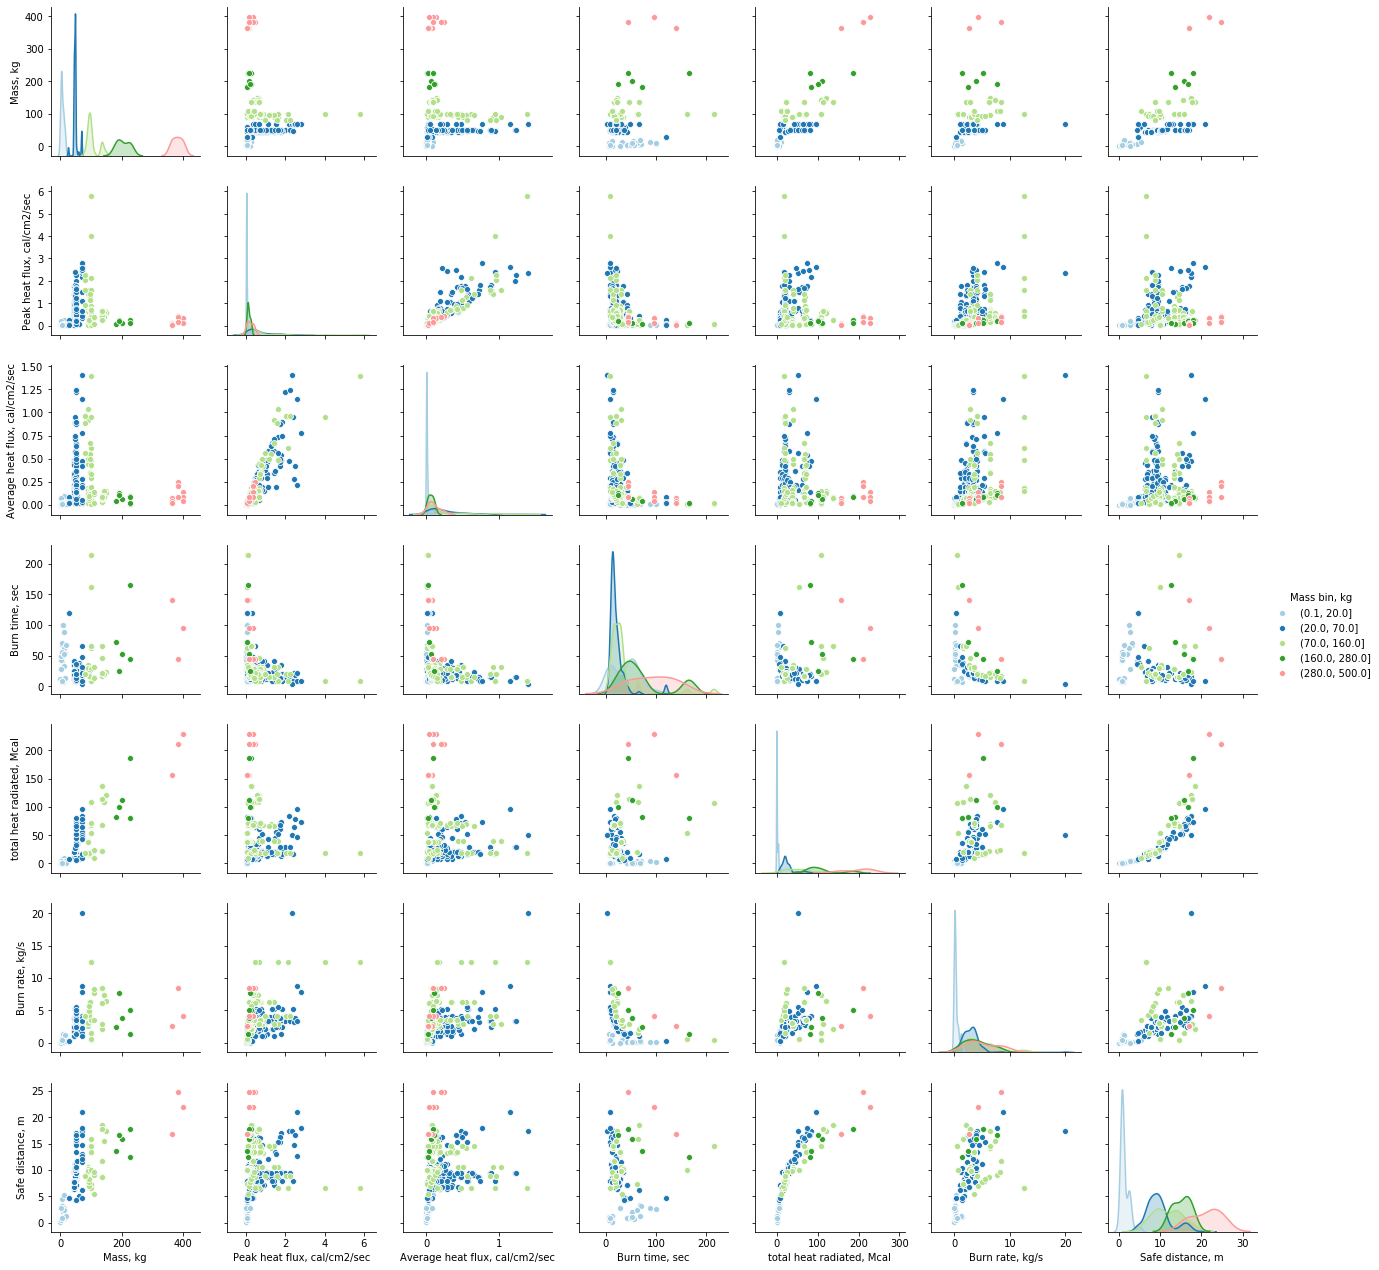

In [19]:
sea.pairplot(dfsub, hue="Mass bin, kg")
plt.show()

From the above pair plot there are a number of apparrent correlations: <br>
  - peak heat flux is proportional to average heat flux
  - total heat radiated is inversly proportional to average and peak heat flux
  - burn time is also inversly proportional to average and peak heat flux
  - safe distance appears to correlate to the total heat radiated
  - mass of propellant is proportional to the total heat radiated

### Plot of the Safe Distance versus Total Heat Radiated

In [20]:
factor = np.percentile(df['Safe distance, m']/(df['total heat radiated, Mcal']**(1/2)),75)
factor

1.9398342606063685

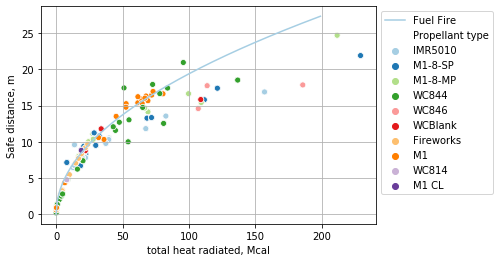

In [21]:
#plot showing the relationship of safe distance versus total heat radiated
fig, ax = plt.subplots(1,1,figsize=(6,4))
sea.scatterplot(df['total heat radiated, Mcal'],df['Safe distance, m'],hue=df['Propellant type'],ax=ax)
x = np.arange(0,200); y=factor*x**(1/2)
plt.plot(x,y,label='Fuel Fire')
plt.legend(bbox_to_anchor=(1, 1))
plt.grid()
plt.show()

### Plot of the Total heat radiated versus the caluclated heat radiated.

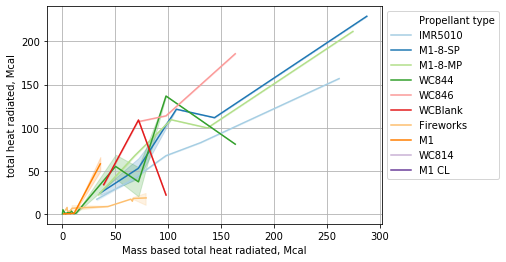

In [22]:
fig, ax = plt.subplots(1,1,figsize=(6,4))
sea.lineplot(df['Mass, kg']*0.3*2.4,df['total heat radiated, Mcal'],hue=df['Propellant type'],ax=ax)
#The factor 2.4 comes from the heat of combustion (2.4 Mcal/kg) and the 0.3 factor is the conservative estimate of the total energy radiated
plt.xlabel('Mass based total heat radiated, Mcal')
plt.legend(bbox_to_anchor=(1, 1))
plt.grid()
plt.show()

## Plot of the Safe Distance versus Mass

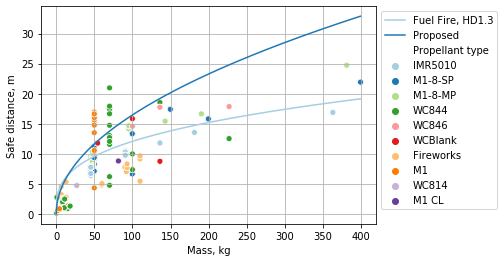

In [23]:
#plot showing the relationship of safe distance versus total heat radiated
fig, ax = plt.subplots(1,1,figsize=(6,4))
#ax.set_xscale('log'); ax.set_yscale('log')
sea.scatterplot(df['Mass, kg'],df['Safe distance, m'],hue=df['Propellant type'],ax=ax)
x = np.arange(0,400); y=2.6*x**(1/3); y1=factor*(2.4*0.3*x)**(1/2) #factor*(2.4*0.3)^0.5 = 1.65
plt.plot(x,y,label='Fuel Fire, HD1.3'); plt.plot(x,y1,label='Proposed')
#plt.xlim([1,1000]); plt.ylim([1,100])
plt.legend(bbox_to_anchor=(1, 1))
plt.grid()
plt.show()

The proposed relationship is:
\begin{align}
d(m) & = 1.65\cdot [M(kg)]^{0.5}
\end{align}

Access notebook online: https://nbviewer.jupyter.org/github/clint-bg/heatflux/blob/master/propellantheatfluxv3.ipynb

## Appendix: Plot of the Point source parameter versus mass

The plot correlating the point source parameter to mass has been used (see Reference 2) in the past to correlate mass to the heat flux. In this case, the relationship isn't very good. Also plotted on the plot is the suggested correlation to heat flux for propellant per Reference 2. As a reminder, the point source parameter is:
\begin{align}
q & = \frac{\alpha}{r^2}:\> \text{Point source model}\\
\alpha & = q{r^2}:\> \text{Point source parameter}
\end{align}

In [24]:
qR2 = df.groupby('Unique ID').apply(lambda x: (np.percentile(x['Average heat flux, cal/cm2/sec']*10*
                                                                   x['Distance, m']**pso,75)))
pType = df.groupby('Unique ID').apply(lambda x: set(x['Propellant type']).pop())
pMass = df.groupby('Unique ID').apply(lambda x: set(x['Mass, kg']).pop())
qR2.name = 'qR2, kcal/sec'
dfs = qR2.to_frame()
dfs['Burn rate, kg/s']=burnRate;dfs['Safe Distance, m']=safeDistance
dfs['Propellant type']=pType;dfs['Mass, kg']=pMass
dfs = dfs.set_index('Safe Distance, m')

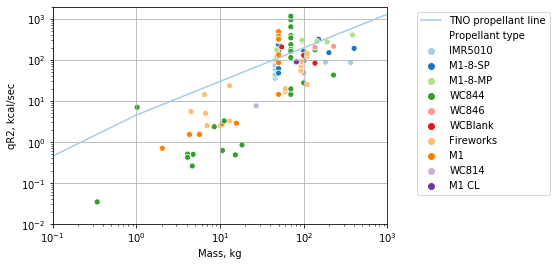

In [25]:
#plot showing the relationship of qR2(kcal/sec) to Mass (kg) on a log-log plot
fig, ax = plt.subplots(1,1,figsize=(6,4))
ax.set_xscale('log'); ax.set_yscale('log')
sea.scatterplot(dfs['Mass, kg'],dfs['qR2, kcal/sec'],hue=dfs['Propellant type'],ax=ax)
x = np.arange(0,1300); y=1.9e4/4184*x**0.82
plt.xlim([0.1,1000]); plt.ylim([0.01,2000])
plt.plot(x,y,label='TNO propellant line')
plt.legend(bbox_to_anchor=(1.5, 1))
plt.grid()
plt.show()